In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

raw_dataset = pd.read_csv('C:/BIA Sycn/BIA652/Final Project/data_with house price.csv')

In [39]:
raw_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
raw_dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
raw_dataset.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [42]:
## add column" High_Price" to the dataframe
raw_dataset['High_Price'] = np.where(raw_dataset['SalePrice'] >163000, 1, 0)

In [43]:
raw_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,High_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [73]:
## make a copy of raw_dataset
dataset=raw_dataset.copy()

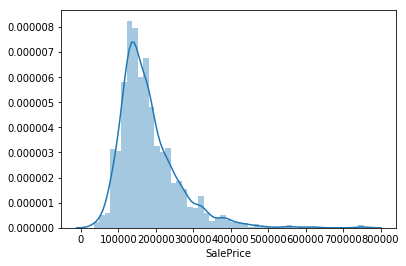

In [74]:
import seaborn as sns
sns.distplot(dataset['SalePrice'])

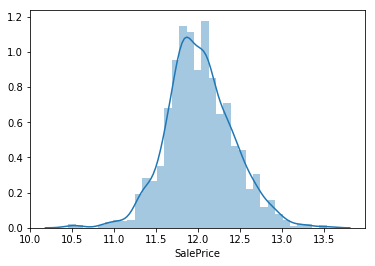

In [75]:
## transform saleprice displot to Normal Distribution shape
train_labels = dataset['SalePrice']
train_labels=np.log(train_labels)
ax = sns.distplot(train_labels)

In [76]:
NAs = pd.concat([dataset.isnull().sum()], axis=1, keys=['dataset'])
NAs[NAs.sum(axis=1) > 0]

,dataset
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [77]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,High_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [91]:
dataset_2=dataset.copy()

In [125]:
features_all = pd.concat([dataset_2], keys=['dataset_2'])

In [126]:
features_all.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataset_2 0   1          60       RL         65.0     8450   Pave   NaN   
          1   2          20       RL         80.0     9600   Pave   NaN   
          2   3          60       RL         68.0    11250   Pave   NaN   
          3   4          70       RL         60.0     9550   Pave   NaN   
          4   5          60       RL         84.0    14260   Pave   NaN   

            LotShape LandContour Utilities     ...     PoolQC Fence  \
dataset_2 0      Reg         Lvl    AllPub     ...        NaN   NaN   
          1      Reg         Lvl    AllPub     ...        NaN   NaN   
          2      IR1         Lvl    AllPub     ...        NaN   NaN   
          3      IR1         Lvl    AllPub     ...        NaN   NaN   
          4      IR1         Lvl    AllPub     ...        NaN   NaN   

            MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  \
dataset_2 0         NaN       0      2   2008       WD         Normal   
          1         NaN       0      5   2007       WD         Normal   
          2         NaN       0      9   2008       WD         Normal   
          3         NaN       0      2   2006       WD        Abnorml   
          4         NaN       0     12   2008       WD         Normal   

             SalePrice  High_Price  
dataset_2 0     208500           1  
          1     181500           1  
          2     223500           1  
          3     140000           0  
          4     250000           1  

[5 rows x 82 columns]

In [127]:
features_all.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)
features_all.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataset_2 0   1          60       RL         65.0     8450   Pave   NaN   
          1   2          20       RL         80.0     9600   Pave   NaN   
          2   3          60       RL         68.0    11250   Pave   NaN   
          3   4          70       RL         60.0     9550   Pave   NaN   
          4   5          60       RL         84.0    14260   Pave   NaN   

            LotShape LandContour LotConfig     ...     GarageFinish  \
dataset_2 0      Reg         Lvl    Inside     ...              RFn   
          1      Reg         Lvl       FR2     ...              RFn   
          2      IR1         Lvl    Inside     ...              RFn   
          3      IR1         Lvl    Corner     ...              Unf   
          4      IR1         Lvl       FR2     ...              RFn   

            GarageCars GarageQual PavedDrive MoSold YrSold  SaleType  \
dataset_2 0          2         TA          Y      2   2008        WD   
          1          2         TA          Y      5   2007        WD   
          2          2         TA          Y      9   2008        WD   
          3          3         TA          Y      2   2006        WD   
          4          3         TA          Y     12   2008        WD   

             SaleCondition  SalePrice  High_Price  
dataset_2 0         Normal     208500           1  
          1         Normal     181500           1  
          2         Normal     223500           1  
          3        Abnorml     140000           0  
          4         Normal     250000           1  

[5 rows x 58 columns]

In [128]:
##Filling NAs and converting features¶
# MSSubClass as str
features_all['MSSubClass'] = features_all['MSSubClass'].astype(str)
# MSZoning NA in pred. filling with most popular values
features_all['MSZoning'] = features_all['MSZoning'].fillna(features_all['MSZoning'].mode()[0])
# LotFrontage  NA in all. I suppose NA means 0
features_all['LotFrontage'] = features_all['LotFrontage'].fillna(features_all['LotFrontage'].mean())

# Alley  NA in all. NA means no access
features_all['Alley'] = features_all['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
features_all.OverallCond = features_all.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
features_all['MasVnrType'] = features_all['MasVnrType'].fillna(features_all['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features_all[col] = features_all[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
features_all['TotalBsmtSF'] = features_all['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
features_all['Electrical'] = features_all['Electrical'].fillna(features_all['Electrical'].mode()[0])

# KitchenAbvGr to categorical
features_all['KitchenAbvGr'] = features_all['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
features_all['KitchenQual'] = features_all['KitchenQual'].fillna(features_all['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
features_all['FireplaceQu'] = features_all['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    features_all[col] = features_all[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
features_all['GarageCars'] = features_all['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
features_all['SaleType'] = features_all['SaleType'].fillna(features_all['SaleType'].mode()[0])

# Year and Month to categorical
features_all['YrSold'] = features_all['YrSold'].astype(str)
features_all['MoSold'] = features_all['MoSold'].astype(str)

 # Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features_all['TotalSF'] = features_all['TotalBsmtSF'] + features_all['1stFlrSF'] + features_all['2ndFlrSF']
features_all.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
dataset_2 0   1         60       RL         65.0     8450   Pave  NOACCESS   
          1   2         20       RL         80.0     9600   Pave  NOACCESS   
          2   3         60       RL         68.0    11250   Pave  NOACCESS   
          3   4         70       RL         60.0     9550   Pave  NOACCESS   
          4   5         60       RL         84.0    14260   Pave  NOACCESS   

            LotShape LandContour LotConfig   ...    GarageCars GarageQual  \
dataset_2 0      Reg         Lvl    Inside   ...             2         TA   
          1      Reg         Lvl       FR2   ...             2         TA   
          2      IR1         Lvl    Inside   ...             2         TA   
          3      IR1         Lvl    Corner   ...             3         TA   
          4      IR1         Lvl       FR2   ...             3         TA   

            PavedDrive MoSold YrSold SaleType  SaleCondition SalePrice  \
dataset_2 0          Y      2   2008       WD         Normal    208500   
          1          Y      5   2007       WD         Normal    181500   
          2          Y      9   2008       WD         Normal    223500   
          3          Y      2   2006       WD        Abnorml    140000   
          4          Y     12   2008       WD         Normal    250000   

             High_Price  TotalSF  
dataset_2 0           1     2566  
          1           1     2524  
          2           1     2706  
          3           0     2473  
          4           1     3343  

[5 rows x 59 columns]

In [129]:
features_all.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
features_all.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
dataset_2 0   1         60       RL         65.0     8450   Pave  NOACCESS   
          1   2         20       RL         80.0     9600   Pave  NOACCESS   
          2   3         60       RL         68.0    11250   Pave  NOACCESS   
          3   4         70       RL         60.0     9550   Pave  NOACCESS   
          4   5         60       RL         84.0    14260   Pave  NOACCESS   

            LotShape LandContour LotConfig   ...    GarageCars GarageQual  \
dataset_2 0      Reg         Lvl    Inside   ...             2         TA   
          1      Reg         Lvl       FR2   ...             2         TA   
          2      IR1         Lvl    Inside   ...             2         TA   
          3      IR1         Lvl    Corner   ...             3         TA   
          4      IR1         Lvl       FR2   ...             3         TA   

            PavedDrive MoSold YrSold SaleType  SaleCondition SalePrice  \
dataset_2 0          Y      2   2008       WD         Normal    208500   
          1          Y      5   2007       WD         Normal    181500   
          2          Y      9   2008       WD         Normal    223500   
          3          Y      2   2006       WD        Abnorml    140000   
          4          Y     12   2008       WD         Normal    250000   

             High_Price  TotalSF  
dataset_2 0           1     2566  
          1           1     2524  
          2           1     2706  
          3           0     2473  
          4           1     3343  

[5 rows x 56 columns]

In [130]:
## Standardizing numeric features
numeric_features = features_all.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

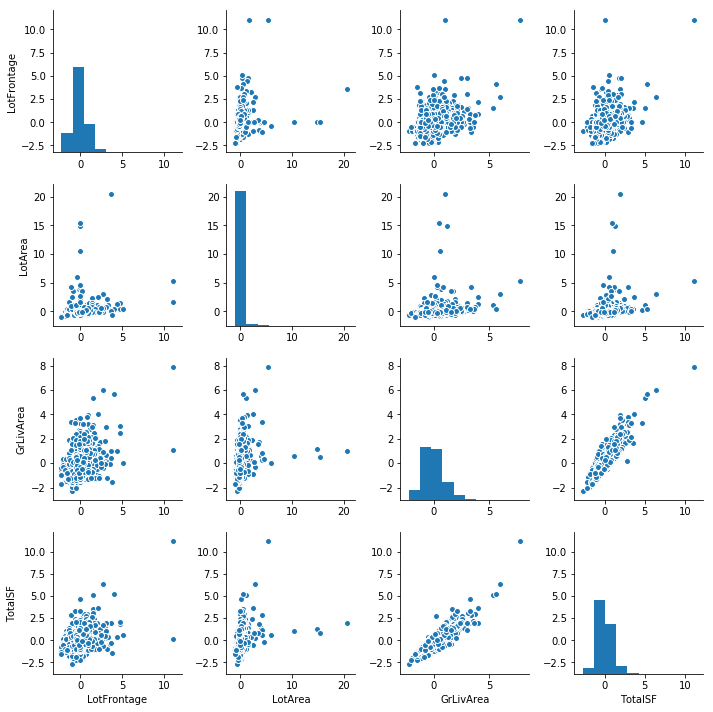

In [131]:
ax = sns.pairplot(numeric_features_standardized)

In [132]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in features_all['Condition1']] + [x for x in features_all['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(features_all.index), len(conditions))),
                       index=features_all.index, columns=conditions)
for i, cond in enumerate(zip(features_all['Condition1'], features_all['Condition2'])):
    dummies.ix[i, cond] = 1
features_all = pd.concat([features_all, dummies.add_prefix('Condition_')], axis=1)
features_all.drop(['Condition1', 'Condition2'], axis=1, inplace=True)
features_all.head()

C:\Users\ivyfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Id MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
dataset_2 0   1         60       RL         65.0     8450   Pave  NOACCESS   
          1   2         20       RL         80.0     9600   Pave  NOACCESS   
          2   3         60       RL         68.0    11250   Pave  NOACCESS   
          3   4         70       RL         60.0     9550   Pave  NOACCESS   
          4   5         60       RL         84.0    14260   Pave  NOACCESS   

            LotShape LandContour LotConfig      ...       TotalSF  \
dataset_2 0      Reg         Lvl    Inside      ...          2566   
          1      Reg         Lvl       FR2      ...          2524   
          2      IR1         Lvl    Inside      ...          2706   
          3      IR1         Lvl    Corner      ...          2473   
          4      IR1         Lvl       FR2      ...          3343   

            Condition_PosA Condition_RRNn Condition_RRNe  Condition_RRAn  \
dataset_2 0            0.0            0.0            0.0             0.0   
          1            0.0            0.0            0.0             0.0   
          2            0.0            0.0            0.0             0.0   
          3            0.0            0.0            0.0             0.0   
          4            0.0            0.0            0.0             0.0   

            Condition_RRAe  Condition_Artery  Condition_Norm Condition_Feedr  \
dataset_2 0            0.0               0.0             1.0             0.0   
          1            0.0               0.0             1.0             1.0   
          2            0.0               0.0             1.0             0.0   
          3            0.0               0.0             1.0             0.0   
          4            0.0               0.0             1.0             0.0   

            Condition_PosN  
dataset_2 0            0.0  
          1            0.0  
          2            0.0  
          3            0.0  
          4            0.0  

[5 rows x 63 columns]

In [133]:
# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in features_all['Exterior1st']] + [x for x in features_all['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(features_all.index), len(exteriors))),
                       index=features_all.index, columns=exteriors)
for i, ext in enumerate(zip(features_all['Exterior1st'], features_all['Exterior2nd'])):
    dummies.ix[i, ext] = 1
features_all = pd.concat([features_all, dummies.add_prefix('Exterior_')], axis=1)
features_all.drop(['Exterior1st','Exterior2nd'], axis=1, inplace=True)


C:\Users\ivyfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [138]:
features_all_2=features_all.copy()

In [139]:
# Getting Dummies from all other categorical vars
for col in features_all_2.dtypes[features_all_2.dtypes == 'object'].index:
    for_dummy = features_all_2.pop(col)
    features_all_2= pd.concat([features_all_2, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [140]:
features_all_2.head()

Id  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
dataset_2 0   1         65.0     8450            7       2003          2003   
          1   2         80.0     9600            6       1976          1976   
          2   3         68.0    11250            7       2001          2002   
          3   4         60.0     9550            7       1915          1970   
          4   5         84.0    14260            8       2000          2000   

             GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
dataset_2 0       1710         2         1             3   
          1       1262         2         0             3   
          2       1786         2         1             3   
          3       1717         1         0             3   
          4       2198         2         1             4   

                     ...            SaleType_ConLw  SaleType_New  \
dataset_2 0          ...                         0             0   
          1          ...                         0             0   
          2          ...                         0             0   
          3          ...                         0             0   
          4          ...                         0             0   

             SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
dataset_2 0             0            1                      0   
          1             0            1                      0   
          2             0            1                      0   
          3             0            1                      1   
          4             0            1                      0   

             SaleCondition_AdjLand  SaleCondition_Alloca  \
dataset_2 0                      0                     0   
          1                      0                     0   
          2                      0                     0   
          3                      0                     0   
          4                      0                     0   

             SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
dataset_2 0                     0                     1                      0  
          1                     0                     1                      0  
          2                     0                     1                      0  
          3                     0                     0                      0  
          4                     0                     1                      0  

[5 rows x 264 columns]

In [141]:
### Copying features
features_standardized = features_all_2.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

In [142]:
## Now, all caterial features have got dummies and all numeric features have standardized!!!!!!!!!!
features_standardized.head()

Id  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
dataset_2 0   1    -0.229293 -0.207071            7       2003          2003   
          1   2     0.451781 -0.091855            6       1976          1976   
          2   3    -0.093078  0.073455            7       2001          2002   
          3   4    -0.456318 -0.096864            7       1915          1970   
          4   5     0.633401  0.375020            8       2000          2000   

             GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
dataset_2 0   0.370207         2         1             3   
          1  -0.482347         2         0             3   
          2   0.514836         2         1             3   
          3   0.383528         1         0             3   
          4   1.298881         2         1             4   

                     ...            SaleType_ConLw  SaleType_New  \
dataset_2 0          ...                         0             0   
          1          ...                         0             0   
          2          ...                         0             0   
          3          ...                         0             0   
          4          ...                         0             0   

             SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
dataset_2 0             0            1                      0   
          1             0            1                      0   
          2             0            1                      0   
          3             0            1                      1   
          4             0            1                      0   

             SaleCondition_AdjLand  SaleCondition_Alloca  \
dataset_2 0                      0                     0   
          1                      0                     0   
          2                      0                     0   
          3                      0                     0   
          4                      0                     0   

             SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
dataset_2 0                     0                     1                      0  
          1                     0                     1                      0  
          2                     0                     1                      0  
          3                     0                     0                      0  
          4                     0                     1                      0  

[5 rows x 264 columns]

In [144]:
## Compared with features table which has not got dummies, the columns increased from 80 to 264. 
features_all.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
dataset_2 0   1         60       RL         65.0     8450   Pave  NOACCESS   
          1   2         20       RL         80.0     9600   Pave  NOACCESS   
          2   3         60       RL         68.0    11250   Pave  NOACCESS   
          3   4         70       RL         60.0     9550   Pave  NOACCESS   
          4   5         60       RL         84.0    14260   Pave  NOACCESS   

            LotShape LandContour LotConfig       ...        Exterior_HdBoard  \
dataset_2 0      Reg         Lvl    Inside       ...                     0.0   
          1      Reg         Lvl       FR2       ...                     0.0   
          2      IR1         Lvl    Inside       ...                     0.0   
          3      IR1         Lvl    Corner       ...                     0.0   
          4      IR1         Lvl       FR2       ...                     0.0   

            Exterior_BrkComm Exterior_AsphShn Exterior_CBlock  \
dataset_2 0              0.0              0.0             0.0   
          1              0.0              0.0             0.0   
          2              0.0              0.0             0.0   
          3              0.0              0.0             0.0   
          4              0.0              0.0             0.0   

             Exterior_CmentBd Exterior_Other  Exterior_CemntBd  \
dataset_2 0               0.0            0.0               0.0   
          1               0.0            0.0               0.0   
          2               0.0            0.0               0.0   
          3               0.0            0.0               0.0   
          4               0.0            0.0               0.0   

             Exterior_Plywood Exterior_BrkFace Exterior_AsbShng  
dataset_2 0               0.0              0.0              0.0  
          1               0.0              0.0              0.0  
          2               0.0              0.0              0.0  
          3               0.0              0.0              0.0  
          4               0.0              0.0              0.0  

[5 rows x 80 columns]

In [143]:
## save the dataframe
features_standardized.to_csv('D:/feature_standardized.csv')

In [146]:
## Drop the column "ID" in table cuz it is not a feature
features_all_3=features_standardized.copy()
features_all_3.drop(['Id'],axis=1,inplace=True)
features_all_3.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
dataset_2 0    -0.229293 -0.207071            7       2003          2003   
          1     0.451781 -0.091855            6       1976          1976   
          2    -0.093078  0.073455            7       2001          2002   
          3    -0.456318 -0.096864            7       1915          1970   
          4     0.633401  0.375020            8       2000          2000   

             GrLivArea  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
dataset_2 0   0.370207         2         1             3             8   
          1  -0.482347         2         0             3             6   
          2   0.514836         2         1             3             6   
          3   0.383528         1         0             3             7   
          4   1.298881         2         1             4             9   

                     ...            SaleType_ConLw  SaleType_New  \
dataset_2 0          ...                         0             0   
          1          ...                         0             0   
          2          ...                         0             0   
          3          ...                         0             0   
          4          ...                         0             0   

             SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
dataset_2 0             0            1                      0   
          1             0            1                      0   
          2             0            1                      0   
          3             0            1                      1   
          4             0            1                      0   

             SaleCondition_AdjLand  SaleCondition_Alloca  \
dataset_2 0                      0                     0   
          1                      0                     0   
          2                      0                     0   
          3                      0                     0   
          4                      0                     0   

             SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
dataset_2 0                     0                     1                      0  
          1                     0                     1                      0  
          2                     0                     1                      0  
          3                     0                     0                      0  
          4                     0                     1                      0  

[5 rows x 263 columns]

In [148]:
features_all_4=features_all_3.copy()

In [151]:
## Remove collumn'SalePrice' and 'High_Price' to get a dataframe that contains all variable for fitting the model
features_all_4.drop(['SalePrice','High_Price'],axis=1,inplace=True)

In [154]:
train_features = features_all_4.select_dtypes(include=[np.number]).values

In [157]:
#train_features_st = features_standardized.drop('Id'+'SalePrice'+'High_Price', axis=1).select_dtypes(include=[np.number]).values

ValueError: labels ['IdSalePriceHigh_Price'] not contained in axis

In [160]:
##Random split the dataset into train dataset and test dataset. The size of test dataset is 0.3 of raw dataset.
X_train, X_test, y_train, y_test = train_test_split(train_features,features_all_3['High_Price'],test_size=0.3, random_state=2)

In [163]:
## Check the X_train datatype 
X_train

array([[  1.03238940e-14,  -2.76400647e-01,   7.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -4.56318017e-01,  -7.80289961e-02,   5.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -4.56318017e-01,   2.83703438e-02,   5.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [ -2.26835800e-03,  -2.59068174e-01,   5.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -1.38483256e-01,   4.43948933e-01,   9.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [ -4.56318017e-01,  -9.18548990e-02,   5.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

In [164]:
##Use Logistic Regression classifier to set up model
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
from sklearn.metrics import roc_auc_score
predictions_LR = model_LR.predict(X_test)
print('AUC: ', roc_auc_score(y_test, predictions_LR))

AUC:  0.923047993147


In [171]:
## Draw confustion matrix table 
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, model_LR.predict(X_test))
conf_matrix

array([[196,  13],
       [ 21, 208]], dtype=int64)

In [172]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Classification')
    plt.xlabel('Predicted Classification')

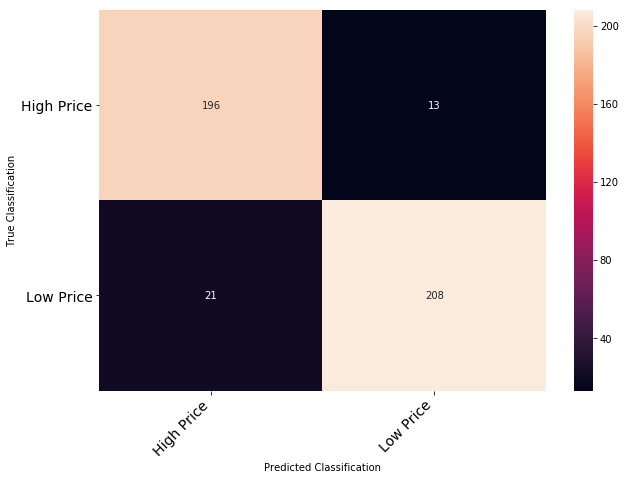

In [173]:
print_confusion_matrix(conf_matrix, ['High Price', 'Low Price'])

In [183]:
## Calculate the accuracy score : the proportion of all correct classifications 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model_LR.predict(X_test) )

0.92237442922374424

In [188]:
## Calculate the precision score, recall score and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

p_score_LR=precision_score(y_test, model_LR.predict(X_test), average='binary')  
Re_score_LR=recall_score(y_test, model_LR.predict(X_test), average='binary')  
f1_score_LR=f1_score(y_test, model_LR.predict(X_test), average='binary')  
print(p_score_LR)  
print(Re_score_LR)  
print(f1_score_LR)  

0.941176470588
0.908296943231
0.924444444444


In [190]:
## Another Classifier: use Gaussian Naive Bayes classifier for multinomial models 
#from sklearn.naive_bayes import MultinomialNB

In [191]:
#MulNB = MultinomialNB()

In [192]:
#MulNB.fit(X_train, y_train)

ValueError: Input X must be non-negative

In [194]:
from sklearn.naive_bayes import GaussianNB

In [196]:
model_GNB = GaussianNB()

In [197]:
model_GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [198]:
predictions_GNB = model_GNB.predict(X_test)
print('AUC: ', roc_auc_score(y_test, predictions_GNB))

AUC:  0.797183510583


In [199]:
conf_matrix_GNB = confusion_matrix(y_test, model_GNB.predict(X_test))
conf_matrix_GNB

array([[137,  72],
       [ 14, 215]], dtype=int64)

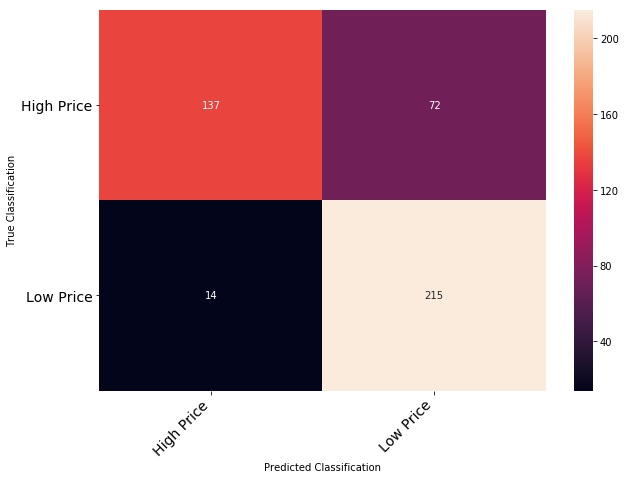

In [200]:
print_confusion_matrix(conf_matrix_GNB, ['High Price', 'Low Price'])

In [201]:
accuracy_score(y_test,model_GNB.predict(X_test) )

0.80365296803652964

In [202]:
p_score_GNB=precision_score(y_test, model_GNB.predict(X_test), average='binary')  
Re_score_GNB=recall_score(y_test, model_GNB.predict(X_test), average='binary')  
f1_score_GNB=f1_score(y_test, model_GNB.predict(X_test), average='binary')  
print(p_score_GNB)  
print(Re_score_GNB)  
print(f1_score_GNB) 


0.749128919861
0.938864628821
0.833333333333


In [203]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [204]:
pca = PCA(whiten=True)
pca.fit(X_train)
variance_pca = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([ 0.81058126,  0.98259052,  0.98621198,  0.98731756,  0.98825783,
        0.98887951,  0.98941712,  0.98989775,  0.99028334,  0.99062564,
        0.99093945,  0.99124219,  0.99153256,  0.99178293,  0.99202124,
        0.99225055,  0.99247717,  0.992694  ,  0.99290853,  0.99311229,
        0.99329537,  0.9934752 ,  0.99364831,  0.99381882,  0.99398288,
        0.99414244,  0.99429787,  0.99444822,  0.9945947 ,  0.99473378,
        0.99487072,  0.99500251,  0.995133  ,  0.99526131,  0.99538481,
        0.99550536,  0.9956217 ,  0.99573405,  0.99584461,  0.99595191,
        0.9960581 ,  0.99616251,  0.99626251,  0.9963617 ,  0.99645545,
        0.99654542,  0.99663398,  0.99671943,  0.99680225,  0.99688404,
        0.99696285,  0.99704089,  0.99711467,  0.99718726,  0.99725757,
        0.99732723,  0.99739349,  0.9974583 ,  0.9975219 ,  0.99758494,
        0.99764692,  0.99770609,  0.99776419,  0.99782135,  0.99787666,
        0.99793121,  0.99798487,  0.99803769,  0.99808898,  0.99

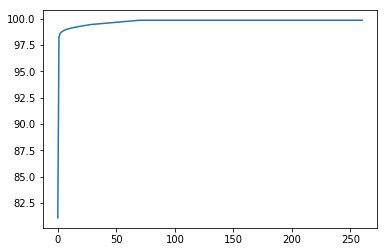

In [208]:
Var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(Var1)

In [271]:
pca_2 = PCA(n_components=50)

In [272]:
pca_3=pca_2.fit(X_train)

In [273]:
X_train_PCA = pca_3.transform(X_train)
X_train_PCA

array([[  5.08724775e+01,  -1.21049282e+01,   2.93533881e+00, ...,
         -4.67918372e-01,   5.84373241e-01,   8.13964594e-03],
       [  5.71547570e+01,  -8.89383220e+00,   1.00755343e+00, ...,
         -1.01037451e-01,   1.09696238e-01,   5.74472094e-01],
       [  6.50949276e+01,  -4.67506340e+00,   1.61033063e+00, ...,
         -2.66267429e-01,   2.90237668e-01,  -8.33134769e-01],
       ..., 
       [  2.06879918e+01,  -1.68959573e+01,  -2.76193082e-01, ...,
         -2.45083354e-01,   7.04769366e-01,   3.15607673e-01],
       [ -4.44334362e+01,   3.40066578e+00,   5.18415772e+00, ...,
          2.19551041e-01,  -2.08410800e-01,   2.09681842e-01],
       [  3.57808371e+01,   2.95676237e+01,  -1.11102811e+00, ...,
         -2.57269601e-01,   2.87784568e-01,  -7.07703321e-02]])

In [274]:
X_test_PCA=pca_3.transform(X_test)
X_test_PCA

array([[  4.21478121e+00,   1.63351668e+01,   1.76660017e-01, ...,
         -2.00041379e-01,   1.97849889e-01,   2.82431570e-01],
       [ -1.32097868e+01,  -6.37812378e+00,   9.21180743e-01, ...,
         -2.50253455e-01,  -1.57341267e-01,  -4.75386274e-01],
       [  2.57676231e+01,   2.90186359e+01,   5.44902984e+00, ...,
         -5.65641908e-01,  -2.00910481e-02,   4.07203202e-01],
       ..., 
       [ -3.52706680e+01,   1.22521027e+00,   4.56618011e-01, ...,
          1.49743873e-01,   1.44642830e-01,   4.63646498e-01],
       [ -3.80037543e+01,   2.07657043e+00,   2.31861365e-01, ...,
         -5.14480063e-02,  -1.22265888e-01,  -2.03271670e-01],
       [  1.79579102e+01,  -1.60742518e+01,  -4.62796128e-01, ...,
          2.11954345e-01,   4.80388562e-02,  -8.71720432e-02]])

In [275]:
model_LR_PCA=model_LR.fit(X_train_PCA, y_train)

In [276]:
predictions_LR_PCA = model_LR_PCA.predict(X_test_PCA)
print('AUC: ', roc_auc_score(y_test, predictions_LR_PCA))

AUC:  0.925440337644


In [277]:
p_score_LR_PCA=precision_score(y_test, model_LR_PCA.predict(X_test_PCA), average='binary')  
Re_score_LR_PCA=recall_score(y_test, model_LR_PCA.predict(X_test_PCA), average='binary')  
f1_score_LR_PCA=f1_score(y_test, model_LR_PCA.predict(X_test_PCA), average='binary')  
print(p_score_LR_PCA)  
print(Re_score_LR_PCA)  
print(f1_score_LR_PCA) 

0.945454545455
0.908296943231
0.926503340757


In [278]:
model_GNB_PCA=model_GNB.fit(X_train_PCA, y_train)

In [279]:
predictions_GNB_PCA = model_GNB_PCA.predict(X_test_PCA)
print('AUC: ', roc_auc_score(y_test, predictions_GNB_PCA))

AUC:  0.876360711226


In [280]:
accuracy_score(y_test,model_GNB_PCA.predict(X_test_PCA) )

0.87442922374429222

In [281]:
p_score_GNB_PCA=precision_score(y_test, model_GNB_PCA.predict(X_test_PCA), average='binary')  
Re_score_GNB_PCA=recall_score(y_test, model_GNB_PCA.predict(X_test_PCA), average='binary')  
f1_score_GNB_PCA=f1_score(y_test, model_GNB_PCA.predict(X_test_PCA), average='binary')  
print(p_score_GNB_PCA)  
print(Re_score_GNB_PCA)  
print(f1_score_GNB_PCA) 

0.918269230769
0.834061135371
0.87414187643


In [282]:
## try other classifier
from sklearn.naive_bayes import BernoulliNB

In [283]:
model_BNB = BernoulliNB()

In [299]:
model_BNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [300]:
predictions_BNB = model_BNB.predict(X_test)
print('AUC: ', roc_auc_score(y_test, predictions_BNB))

AUC:  0.911295209043


In [301]:
accuracy_score(y_test,model_BNB.predict(X_test) )

0.91095890410958902

In [297]:
conf_matrix_BNB = confusion_matrix(y_test, model_BNB.predict(X_test))
conf_matrix_BNB

array([[192,  17],
       [ 22, 207]], dtype=int64)

In [298]:
p_score_BNB=precision_score(y_test, model_BNB.predict(X_test), average='binary')  
Re_score_BNB=recall_score(y_test, model_BNB.predict(X_test), average='binary')  
f1_score_BNB=f1_score(y_test, model_BNB.predict(X_test), average='binary')  
print(p_score_BNB)  
print(Re_score_BNB)  
print(f1_score_BNB)

0.924107142857
0.903930131004
0.913907284768


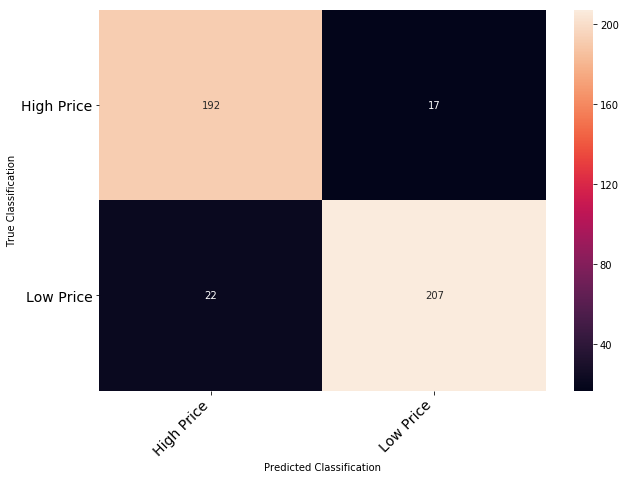

In [294]:
print_confusion_matrix(conf_matrix_BNB, ['High Price', 'Low Price'])

In [286]:
model_BNB_PCA=model_BNB.fit(X_train_PCA, y_train)

In [287]:
predictions_BNB_PCA = model_BNB_PCA.predict(X_test_PCA)
print('AUC: ', roc_auc_score(y_test, predictions_BNB_PCA))

AUC:  0.807609535948
